# Análisis de satisfacción para aerolinea

In [116]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sklearn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn import ensemble
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder
import warnings


In [117]:
df = pd.read_csv('satisfaction.csv')
pd.set_option("display.max_columns", None)

df.head(10)

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,satisfied
5,5,111157,Female,Loyal Customer,26,Personal Travel,Eco,1180,3,4,2,1,1,2,1,1,3,4,4,4,4,1,0,0.0,neutral or dissatisfied
6,6,82113,Male,Loyal Customer,47,Personal Travel,Eco,1276,2,4,2,3,2,2,2,2,3,3,4,3,5,2,9,23.0,neutral or dissatisfied
7,7,96462,Female,Loyal Customer,52,Business travel,Business,2035,4,3,4,4,5,5,5,5,5,5,5,4,5,4,4,0.0,satisfied
8,8,79485,Female,Loyal Customer,41,Business travel,Business,853,1,2,2,2,4,3,3,1,1,2,1,4,1,2,0,0.0,neutral or dissatisfied
9,9,65725,Male,disloyal Customer,20,Business travel,Eco,1061,3,3,3,4,2,3,3,2,2,3,4,4,3,2,0,0.0,neutral or dissatisfied


In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

## Interpretación de datos

- **Gender**: Femenino o masculino  
- **Customer type**: Cliente de aerolinea (regular o no regular)   
- **Age**: Edad del pasajero  
- **Type of travel**: El propósito del vuelo del pasajero (viaje personal o de negocios)  
- **Class**: business, economy, economy plus  
- **Flight distance**: Distancia de vuelo  
- **Inflight wifi service**: Nivel de satisfacción con el servicio wifi a bordo (0: no puntuado; 1-5)  
- **Departure/Arrival time convenient**: Nivel de satisfacción de la hora de salida/llegada (0: no calificado; 1-5) Facilidad de reserva  
- **Ease of Online booking**: Tasa de satisfacción de reservas online (0: no puntuado; 1-5)  
- **Gate location**: Nivel de satisfacción con la ubicación de la puerta (0: no calificado; 1-5)  
- **Food and drink**: Nivel de satisfacción con alimentos y bebidas (0: no calificado; 1-5)  
- **Online boarding**: Nivel de satisfacción con el embarque online (0: no puntuado; 1-5)  
- **Seat comfort**: Nivel de satisfacción del asiento (0: no clasificado; 1-5)  
- **Inflight entertainment**: Satisfacción con el entretenimiento durante el vuelo (0: no clasificado; 1-5)  
- **On-board service**: Nivel de satisfacción con el servicio a bordo (0: no calificado; 1-5)  
- **Leg room service**: Nivel de satisfacción con el servicio de sala de piernas (0: no calificado; 1-5)  
- **Baggage handling**: Nivel de satisfacción con el manejo de equipaje (0: no calificado; 1-5)  
- **Checkin service**: Nivel de satisfacción con el servicio de check-in (0: no calificado; 1-5)  
- **Inflight service**: Nivel de satisfacción con el servicio durante el vuelo (0: no calificado; 1-5)  
- **Cleanliness**: Nivel de satisfacción con la limpieza (0: no puntuado; 1-5)

In [119]:
df.isnull().sum()

Unnamed: 0                             0
id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction    

In [120]:
df = df.drop("Unnamed: 0",axis=1)
df = df.drop("id",axis=1)

df

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,satisfied
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,Female,disloyal Customer,23,Business travel,Eco,192,2,1,2,3,2,2,2,2,3,1,4,2,3,2,3,0.0,neutral or dissatisfied
103900,Male,Loyal Customer,49,Business travel,Business,2347,4,4,4,4,2,4,5,5,5,5,5,5,5,4,0,0.0,satisfied
103901,Male,disloyal Customer,30,Business travel,Business,1995,1,1,1,3,4,1,5,4,3,2,4,5,5,4,7,14.0,neutral or dissatisfied
103902,Female,disloyal Customer,22,Business travel,Eco,1000,1,1,1,5,1,1,1,1,4,5,1,5,4,1,0,0.0,neutral or dissatisfied


In [121]:
df['Arrival Delay in Minutes'].fillna(df['Arrival Delay in Minutes'].median(axis = 0), inplace = True)

In [122]:
categoricas = ['Gender', 'Customer Type', 'Type of Travel', 'Class', 'satisfaction', 'Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking', 'Gate location','Food and drink', 'Online boarding','Inflight entertainment', 'On-board service', 'Leg room service','Baggage handling', 'Checkin service', 'Inflight service','Cleanliness']
categoricas_one = ['Gender', 'Customer Type', 'Type of Travel', 'Class', 'satisfaction']

In [123]:
df.loc[df['satisfaction'] == "satisfied", 'satisfaction'] = True
df.loc[df['satisfaction'] == "neutral or dissatisfied", 'satisfaction'] = False

In [124]:
encoder = OneHotEncoder(sparse_output=False)
dfCodificador = encoder.fit_transform(df[categoricas_one])
columnasNuevas = encoder.get_feature_names_out(categoricas_one)
dfcodificado = pd.DataFrame(dfCodificador, columns= columnasNuevas)

df = pd.concat([df, dfcodificado], axis=1)
df.drop(categoricas_one, axis=1, inplace=True)

df

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,Gender_Female,Gender_Male,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus,satisfaction_False,satisfaction_True
0,13,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
1,25,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
2,26,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
3,25,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
4,61,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,23,192,2,1,2,3,2,2,2,2,3,1,4,2,3,2,3,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
103900,49,2347,4,4,4,4,2,4,5,5,5,5,5,5,5,4,0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
103901,30,1995,1,1,1,3,4,1,5,4,3,2,4,5,5,4,7,14.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
103902,22,1000,1,1,1,5,1,1,1,1,4,5,1,5,4,1,0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0


In [125]:
df = df.drop(["satisfaction_False", "Type of Travel_Personal Travel", "Gender_Male", "Customer Type_disloyal Customer"], axis=1)

In [126]:
df = df.rename(columns={"satisfaction_True" : "Satisfied", "Type of Travel_Business travel" : "Business travel", "Gender_Female" : "Gender", "Customer Type_Loyal Customer" : "Loyal Customer"})

#En la columna Gender, se divide en Famale y Male, para Female es 1 y Male es 0

In [127]:
df

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,Gender,Loyal Customer,Business travel,Class_Business,Class_Eco,Class_Eco Plus,Satisfied
0,13,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,25,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
2,26,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0
3,25,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0
4,61,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,23,192,2,1,2,3,2,2,2,2,3,1,4,2,3,2,3,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
103900,49,2347,4,4,4,4,2,4,5,5,5,5,5,5,5,4,0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0
103901,30,1995,1,1,1,3,4,1,5,4,3,2,4,5,5,4,7,14.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
103902,22,1000,1,1,1,5,1,1,1,1,4,5,1,5,4,1,0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0


In [128]:
#Escalado de columnas numericas

from sklearn.preprocessing import MinMaxScaler

columns_to_scale = ['Age', 'Flight Distance', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']

scaler = MinMaxScaler()
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

In [129]:
#Modelo de Random Forest

#importamos librerias
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

from matplotlib import rcParams
import warnings

warnings.filterwarnings("ignore")

# tamaño de la figura en pulgadas
rcParams["figure.figsize"] = 10, 6
np.random.seed(42)

In [130]:
#separamos nuestro variable X y nuestra variable Y que utilizara el modelo 
X = df.drop("Satisfied", axis=1)
y = df["Satisfied"]

In [131]:
#Separacion de de datos de entrenamiento y de prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.20, random_state=42)

In [132]:
#Creacion y entrenamiento del Random Forest
classifier = RandomForestClassifier(n_estimators=100)
classifier.fit(X_train,y_train)

RandomForestClassifier()

In [133]:
#Prediccion de nuestros datos de prueba
y_pred = classifier.predict(X_test)

In [134]:
#Accuracy de nuestro modelo
print("Precisión:", accuracy_score(y_test, y_pred))

Precisión: 0.961503296280256


In [135]:
#Muestra de variables mas importantes para el modelo
feature_importances_df = pd.DataFrame(
    {"feature": list(X.columns), "importance": classifier.feature_importances_}
).sort_values("importance", ascending=False)

# Mostrar
feature_importances_df

,feature,importance
2,Inflight wifi service,0.151004
7,Online boarding,0.149448
21,Class_Business,0.094726
20,Business travel,0.080401
9,Inflight entertainment,0.057455
8,Seat comfort,0.050577
22,Class_Eco,0.040199
4,Ease of Online booking,0.038176
1,Flight Distance,0.034959
19,Loyal Customer,0.034646


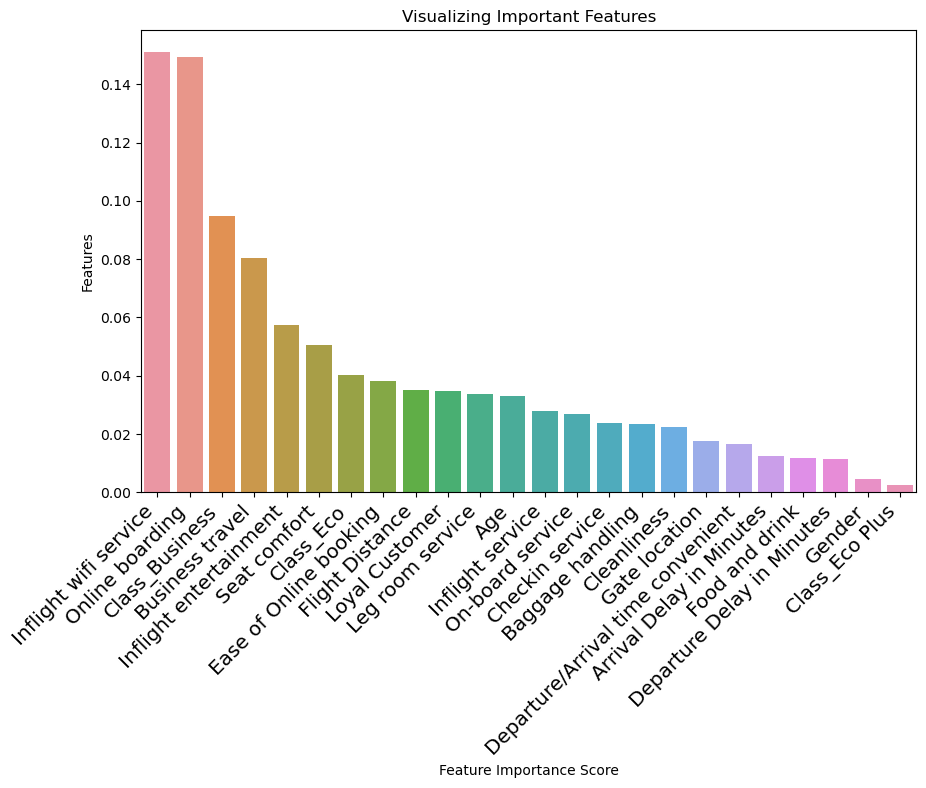

In [136]:
#Grafico de variables mas importantes para el modelo

sns.barplot(x=feature_importances_df.feature, y=feature_importances_df.importance)
# agregar estiquestas

plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Visualizing Important Features")
plt.xticks(
    rotation=45, horizontalalignment="right", fontweight="light", fontsize="x-large"
)
plt.show()